In [2]:
from __future__ import print_function
import numpy as np


In [18]:
# Ensure python 3 forward compatibility
from __future__ import print_function
import numpy as np

def sigmoid(x):
    return 1/(1 + np.exp(-x))

class SigmoidLayer:
    def __init__(self, n_input, n_output):
        self.W = np.random.randn(n_output, n_input)
        self.b = np.random.randn(n_output, 1)
    def output(self, X):
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        return sigmoid(self.W.dot(X) + self.b)

class SigmoidNetwork:

    def __init__(self, layer_sizes):
        '''
        :parameters:
            - layer_sizes : list of int
                List of layer sizes of length L+1 (including the input dimensionality)
        '''
        self.layers = []
        for n_input, n_output in zip(layer_sizes[:-1], layer_sizes[1:]):
            self.layers.append(SigmoidLayer(n_input, n_output))
    
    def train(self, X, y, learning_rate=0.2):
        X = np.array(X)
        y = np.array(y)
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        if y.ndim == 1:
            y = y.reshape(1, -1)
        
        # Forward pass - compute a^n for n in {0, ... L}
        layer_outputs = [X]
        for layer in self.layers:
            layer_outputs.append(layer.output(layer_outputs[-1]))
        
        # Backward pass - compute \partial C/\partial z^m for m in {L, ..., 1}
        cost_partials = [layer_outputs[-1] - y]
        for layer, layer_output in zip(reversed(self.layers), reversed(layer_outputs[:-1])):
            cost_partials.append(layer.W.T.dot(cost_partials[-1])*layer_output*(1 - layer_output))
        cost_partials.reverse()
        
        # Compute weight gradient step
        W_updates = []
        for cost_partial, layer_output in zip(cost_partials[1:], layer_outputs[:-1]):
            W_updates.append(cost_partial.dot(layer_output.T)/X.shape[1])
        # and biases
        b_updates = [cost_partial.mean(axis=1).reshape(-1, 1) for cost_partial in cost_partials[1:]]
        
        for W_update, b_update, layer in zip(W_updates, b_updates, self.layers):
            layer.W -= W_update*learning_rate
            layer.b -= b_update*learning_rate

    def output(self, X):
        a = np.array(X)
        if a.ndim == 1:
            a = a.reshape(-1, 1)
        for layer in self.layers:
            a = layer.output(a)
        return a

In [19]:
nn = SigmoidNetwork([2, 2, 1])
X = np.array([[0, 1, 0, 1], 
              [0, 0, 1, 1]])
y = np.array([0, 1, 1, 0])
for n in range(int(1e3)):
    nn.train(X, y, learning_rate=1.)
print("Input\tOutput\tQuantized")
for i in [[0, 0], [1, 0], [0, 1], [1, 1]]:
    print("{}\t{:.4f}\t{}".format(i, nn.output(i)[0, 0], 1*(nn.output(i)[0] > .5)))

Input	Output	Quantized
[0, 0]	0.0165	[0]
[1, 0]	0.4959	[0]
[0, 1]	0.9895	[1]
[1, 1]	0.5038	[1]


In [24]:
import ipywidgets as widgets
from ipywidgets import *
import matplotlib.pyplot as plt
logistic = lambda h, beta: 1./(1 + np.exp(-beta * h))

@interact(beta=(-1, 10, .1))
def logistic_plot(beta=5):
    hvals = np.linspace(-2, 2)
    plt.plot(hvals, logistic(hvals, beta))

interactive(children=(FloatSlider(value=5.0, description='beta', max=10.0, min=-1.0), Output()), _dom_classes=…

In [1]:
import tensorflow as tf

print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution is: {}".format(tf.executing_eagerly()))
print("Keras version: {}".format(tf.keras.__version__))

TensorFlow version: 2.16.1
Eager execution is: True
Keras version: 3.3.3


In [3]:
damodar = tf.constant("Damodar")
damodar

<tf.Tensor: shape=(), dtype=string, numpy=b'Damodar'>

In [4]:
damodar.numpy()

b'Damodar'

In [7]:
damodar = tf.constant(1,dtype=tf.int64)
damodar

<tf.Tensor: shape=(), dtype=int64, numpy=1>

In [8]:
damo = tf.constant([[1,2],[3,4]])
damo

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]])>

In [11]:
print(damo.numpy())

[[1 2]
 [3 4]]


In [12]:
damo.shape

TensorShape([2, 2])

In [13]:
damo.dtype

tf.int32

In [14]:
tf.ones(shape=(3,3))

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [15]:
const2 = tf.constant(2,tf.int32)
const3 = tf.constant(3,tf.int32)
result = tf.add(const2,const3)
result

<tf.Tensor: shape=(), dtype=int32, numpy=5>

In [16]:
tf.random.normal(shape=(3,3),mean=0,stddev=1.0)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[-0.7423031 ,  0.49730617,  0.56104356],
       [ 0.32578176,  0.37715843,  1.0766712 ],
       [-1.2800843 ,  0.7142359 ,  0.62109447]], dtype=float32)>

In [17]:
tf.random.uniform(shape=(3,3),minval=0,maxval=10,dtype=tf.int32)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[9, 1, 9],
       [3, 7, 4],
       [5, 6, 0]])>

In [18]:
var0 = 24
var1 = tf.Variable(42)
var2 = tf.Variable([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])


In [19]:
var0

24

In [20]:
var1

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=42>

In [21]:
var2

<tf.Variable 'Variable:0' shape=(2, 2, 3) dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])>

In [22]:
float_var = tf.Variable(89,dtype = tf.float64)
float_var

<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=89.0>

In [24]:
var = tf.Variable(89)
print(var)
var.assign(90)
var

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=89>


<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=90>

In [25]:
inital_value = tf.random.normal(shape=(3,3))
a = tf.Variable(inital_value)
print(a)

<tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=
array([[ 0.40570402,  1.2468215 ,  1.3619007 ],
       [ 0.8154949 ,  0.9904125 ,  0.02853067],
       [-0.13177648, -0.11049007, -0.37906578]], dtype=float32)>


In [28]:
new_value = tf.random.normal(shape=(3,3))
a.assign(new_value)
print(a)
for i in  range(3):
    for j in range(3):
        assert a[i,j].numpy() == new_value[i,j].numpy()

print(a)

<tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=
array([[ 2.411582  , -0.42689428,  0.13985828],
       [-0.838627  , -0.5892098 ,  1.5254803 ],
       [-1.769425  ,  0.5824669 , -0.01330743]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=
array([[ 2.411582  , -0.42689428,  0.13985828],
       [-0.838627  , -0.5892098 ,  1.5254803 ],
       [-1.769425  ,  0.5824669 , -0.01330743]], dtype=float32)>


In [29]:
added_value = tf.random.normal(shape=(3,3))
a.assign_add(added_value)
print(a)
for i in range(3):
    for j in range(3):
        assert a[i,j].numpy() == new_value[i,j].numpy() + added_value[i,j].numpy()
print(a)

<tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=
array([[ 2.298068  , -1.0805799 ,  0.5394056 ],
       [-2.0760844 , -0.07380164,  0.9744378 ],
       [-1.9742116 ,  1.5502973 ,  2.0029082 ]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=
array([[ 2.298068  , -1.0805799 ,  0.5394056 ],
       [-2.0760844 , -0.07380164,  0.9744378 ],
       [-1.9742116 ,  1.5502973 ,  2.0029082 ]], dtype=float32)>


In [30]:
# shaping tensor
tensor = tf.Variable([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])
print(tensor.shape)

(2, 2, 3)


In [31]:
tensor1 = tf.reshape(tensor,[2,6])
print(tensor1)


tf.Tensor(
[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]], shape=(2, 6), dtype=int32)


In [32]:
tensor2 = tf.reshape(tensor,[1,12])
print(tensor2)

tf.Tensor([[ 1  2  3  4  5  6  7  8  9 10 11 12]], shape=(1, 12), dtype=int32)


In [34]:
# Ranking tensor
tf.rank(tensor)

<tf.Tensor: shape=(), dtype=int32, numpy=3>

In [36]:
tensor3 = tensor[1,0,2]
tensor3

<tf.Tensor: shape=(), dtype=int32, numpy=9>

In [37]:
tensor_size = tf.size(input=tensor).numpy()

In [38]:
tensor_size

12

In [39]:
tensor*tensor

<tf.Tensor: shape=(2, 2, 3), dtype=int32, numpy=
array([[[  1,   4,   9],
        [ 16,  25,  36]],

       [[ 49,  64,  81],
        [100, 121, 144]]])>

In [40]:
tensor = tensor*4

In [41]:
tensor

<tf.Tensor: shape=(2, 2, 3), dtype=int32, numpy=
array([[[ 4,  8, 12],
        [16, 20, 24]],

       [[28, 32, 36],
        [40, 44, 48]]])>

In [42]:
matrix_u = tf.constant([[2,5,7],[3,6,8]])
matrix_v = tf.constant([[3,6],[4,7],[5,8]])
product = tf.matmul(matrix_u,matrix_v)

In [43]:
product

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 61, 103],
       [ 73, 124]])>

In [45]:
print(tensor1.dtype)
i = tf.cast(tensor1,tf.int64)
print(i.dtype)

<dtype: 'int32'>
<dtype: 'int64'>


In [46]:
j = tf.cast(tf.constant(2.4),dtype=tf.int32)    
j

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [47]:
ragged = tf.ragged.constant([[9,7,8,0],[5,6,0],[1,2,3,4,0],[4,5,6]])
print(ragged)
print(ragged[0,:])
print(ragged[1,:])
print(ragged[2,:])
print(ragged[3,:])


<tf.RaggedTensor [[9, 7, 8, 0], [5, 6, 0], [1, 2, 3, 4, 0], [4, 5, 6]]>
tf.Tensor([9 7 8 0], shape=(4,), dtype=int32)
tf.Tensor([5 6 0], shape=(3,), dtype=int32)
tf.Tensor([1 2 3 4 0], shape=(5,), dtype=int32)
tf.Tensor([4 5 6], shape=(3,), dtype=int32)


In [48]:
varx = tf.Variable([1,2,3,4,5,6,7,8,9,10])
vary = 4
varz = tf.math.equal(varx,vary)
print(varz)
varm = tf.math.squared_difference(varx,vary)
print(varm)

tf.Tensor([False False False  True False False False False False False], shape=(10,), dtype=bool)
tf.Tensor([ 9  4  1  0  1  4  9 16 25 36], shape=(10,), dtype=int32)


In [49]:
number = tf.constant([1,2,3,4,5,6,7,8,9,10])
tf.reduce_mean(input_tensor=number)


<tf.Tensor: shape=(), dtype=int32, numpy=5>

In [54]:
_3d_tensor = tf.constant([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])
print(tf.reduce_mean(input_tensor=_3d_tensor), "\n",
tf.reduce_mean(input_tensor=_3d_tensor,axis=0),'\n', # 1 + 7 / 2 = 4
tf.reduce_mean(input_tensor=_3d_tensor,axis=1),'\n', # 
tf.reduce_mean(input_tensor=_3d_tensor,keepdims=True))

tf.Tensor(6, shape=(), dtype=int32) 
 tf.Tensor(
[[4 5 6]
 [7 8 9]], shape=(2, 3), dtype=int32) 
 tf.Tensor(
[[ 2  3  4]
 [ 8  9 10]], shape=(2, 3), dtype=int32) 
 tf.Tensor([[[6]]], shape=(1, 1, 1), dtype=int32)


In [62]:
tf.random.normal(shape = (3,2), mean=10, stddev=2, dtype=tf.float32, seed=None, name=None)



<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[10.638121, 11.965033],
       [ 9.186861,  9.235863],
       [ 9.319022, 13.770314]], dtype=float32)>

In [60]:

ran = tf.random.normal(shape = (3,2), mean=10.0, stddev=2.0)
print(ran)

tf.Tensor(
[[11.123277   7.9276066]
 [13.963597   9.845302 ]
 [ 9.547457  10.164621 ]], shape=(3, 2), dtype=float32)


In [68]:
tf.random.set_seed(11)

In [67]:
ran1 = tf.random.uniform(shape=(3,2),minval=0,maxval=10,dtype=tf.int32)
print(ran1)
ran2 = tf.random.uniform(shape=(3,2),minval=0,maxval=10,dtype=tf.int32)
print(ran2)

tf.Tensor(
[[4 6]
 [5 2]
 [8 8]], shape=(3, 2), dtype=int32)
tf.Tensor(
[[9 7]
 [9 4]
 [0 1]], shape=(3, 2), dtype=int32)


In [70]:
tf.random.set_seed(11)
ran1 = tf.random.uniform(shape=(3,2),minval=0,maxval=10,dtype=tf.int32)
print(ran1)
ran2 = tf.random.uniform(shape=(3,2),minval=0,maxval=10,dtype=tf.int32)
print(ran2)

tf.Tensor(
[[4 6]
 [5 2]
 [8 8]], shape=(3, 2), dtype=int32)
tf.Tensor(
[[9 7]
 [9 4]
 [0 1]], shape=(3, 2), dtype=int32)


In [71]:
dice1 = tf.Variable(tf.random.uniform([10,1],minval=1,maxval=7,dtype=tf.int32))
dice2 = tf.Variable(tf.random.uniform([10,1],minval=1,maxval=7,dtype=tf.int32))
dice_sum = dice1 + dice2
resulting_matrix = tf.concat(values=[dice1,dice2,dice_sum],axis=1)

In [72]:
resulting_matrix

<tf.Tensor: shape=(10, 3), dtype=int32, numpy=
array([[ 5,  5, 10],
       [ 4,  3,  7],
       [ 5,  3,  8],
       [ 3,  3,  6],
       [ 1,  4,  5],
       [ 4,  1,  5],
       [ 5,  1,  6],
       [ 6,  4, 10],
       [ 3,  3,  6],
       [ 2,  3,  5]])>

In [78]:
t5 = tf.constant([2,11,23,43,5,6,7,8,9,10])

print(t5)

i = tf.argmax(input=t5)
print('index of max value:',i.numpy())
print('Max value:',t5[i].numpy())

i = tf.argmin(input=t5)
print('index of min value:',i.numpy())
print('Min value:',t5[i].numpy())





tf.Tensor([ 2 11 23 43  5  6  7  8  9 10], shape=(10,), dtype=int32)
index of max value: 3
Max value: 43
index of min value: 0
Min value: 2


In [84]:
t5 = tf.constant([2,11,23,43,5,6,7,8,9,10])
t6 = tf.reshape(t5,[2,5])
print(t6)

i = tf.argmax(input=t6,axis=0)
print('Column wise max value:',i.numpy())

i = tf.argmax(input=t6,axis=1)
print('Row wise max value:',i.numpy())

i = tf.argmin(input=t6,axis=0)
print('Column wise min value:',i.numpy())

i = tf.argmin(input=t6,axis=1)
print('Row wise min value:',i.numpy())

tf.Tensor(
[[ 2 11 23 43  5]
 [ 6  7  8  9 10]], shape=(2, 5), dtype=int32)
Column wise max value: [1 0 0 0 1]
Row wise max value: [3 4]
Column wise min value: [0 1 1 1 0]
Row wise min value: [0 0]


In [89]:
variable = tf.Variable([[1,3,5,7],[11,13,17,19]])
checkpoint = tf.train.Checkpoint(var= variable)
save_path = checkpoint.save('./vars')
variable.assign([[0,0,0,0],[0,0,0,0]])
print(variable)



<tf.Variable 'Variable:0' shape=(2, 4) dtype=int32, numpy=
array([[0, 0, 0, 0],
       [0, 0, 0, 0]])>


In [90]:
checkpoint.restore(save_path)
variable

<tf.Variable 'Variable:0' shape=(2, 4) dtype=int32, numpy=
array([[ 1,  3,  5,  7],
       [11, 13, 17, 19]])>

In [96]:
def f1(x,y):

    return tf.reduce_mean(input_tensor=tf.multiply(x**2,5) + y**2)

f2 = tf.function(f1)
x = tf.constant([4.0,-5.0])
y = tf.constant([2.0,3.0])
print('f1:',f1(x,y).numpy())
print('f2:',f2(x,y).numpy())
assert f1(x,y).numpy() == f2(x,y).numpy()

f1: 109.0
f2: 109.0


In [97]:
a = tf.random.normal(shape=(2,2))
b = tf.random.normal(shape=(2,2))

with tf.GradientTape() as tape:
    tape.watch(a)
    c = tf.sqrt(tf.square(a) + tf.square(b))
    dc_da = tape.gradient(c,a)
    print(dc_da)

tf.Tensor(
[[-0.469929    0.89920384]
 [-0.66446567 -0.79767007]], shape=(2, 2), dtype=float32)


In [99]:
a = tf.Variable(a)
print(a)

with tf.GradientTape() as tape:
    c = tf.sqrt(tf.square(a) + tf.square(b))
    dc_da = tape.gradient(c,a)
    print(dc_da)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-0.28425562, -0.49051556],
       [ 0.7645078 ,  0.41764784]], dtype=float32)>
tf.Tensor(
[[-0.1684204 -0.5020665]
 [ 0.9471321  0.5898169]], shape=(2, 2), dtype=float32)


In [100]:
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as tape:
        c = tf.sqrt(tf.square(a) + tf.square(b))
        dc_da = tape.gradient(c,a)
    d2c_da2 = outer_tape.gradient(dc_da,a)
    print(d2c_da2)

tf.Tensor(
[[0.57568985 0.7655419 ]
 [0.12753117 0.9209411 ]], shape=(2, 2), dtype=float32)


# Pytorch


In [1]:
import torch

In [3]:
torch.__version__

'2.3.0+cpu'

In [4]:
t1 = torch.tensor([0,1,2,3,4])  

In [5]:
t2 = torch.tensor([[0,1,2],[3,4,5.0]])

In [7]:
print(t1.dtype)
print(t2.dtype)

torch.int64
torch.float32


In [8]:
t1.shape

torch.Size([5])

In [11]:


# Create a tensor without gradient computation
x = torch.tensor([1, 2, 3],dtype=torch.float32)

# Check if gradient computation is enabled
print(x.requires_grad)  # Output: False

# Enable gradient computation for the tensor
x.requires_grad_(True)

# Check if gradient computation is enabled after modification
print(x.requires_grad)  # Output: True

False
True


In [26]:
x = torch.tensor(3.)
w = torch.tensor(4.,requires_grad=True)
b = torch.tensor(5.,requires_grad=True)
x,w,b

(tensor(3.), tensor(4., requires_grad=True), tensor(5., requires_grad=True))

In [27]:
y = w*x + b
y

tensor(17., grad_fn=<AddBackward0>)

In [30]:
y.backward()

In [31]:
print('dy/dx:',x.grad)
print('dy/dw:',w.grad)
print('dy/db:',b.grad)

dy/dx: None
dy/dw: tensor(3.)
dy/db: tensor(1.)


In [32]:
t6 = torch.full((3,2),7)

In [33]:
t6

tensor([[7, 7],
        [7, 7],
        [7, 7]])

In [35]:
t1 = torch.tensor([[1,2],[3,4]],dtype=torch.float32)
t2 = torch.tensor([[9,8],[7,6]],dtype=torch.float32)

In [39]:
t3 = torch.cat((t2,t1),dim=0)
print(t3)
t4 = torch.cat((t2,t1),dim=1)
t4

tensor([[9., 8.],
        [7., 6.],
        [1., 2.],
        [3., 4.]])


tensor([[9., 8., 1., 2.],
        [7., 6., 3., 4.]])

In [42]:
tt1 = torch.sin(t1)
tt1

tensor([[ 0.8415,  0.9093],
        [ 0.1411, -0.7568]])

In [44]:
import numpy as np  

In [49]:
inputs = np.array([[73,67,43],[91,88,64],[87,134,58],[102,43,37],[69,96,70]],dtype='float32')

In [50]:
targets = np.array([[56,70],[81,101],[119,133],[22,37],[103,119]],dtype='float32')

In [51]:
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

print(inputs) 
"\n"
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [89]:
w = torch.randn(2,3,requires_grad=True)
b = torch.randn(2,requires_grad=True)
print(w)
print(b)

tensor([[ 0.2030, -1.1453,  0.9079],
        [-1.2951, -0.2417, -1.0556]], requires_grad=True)
tensor([-1.0601,  0.2237], requires_grad=True)


In [61]:
def model(x):
    return x @ ( w.t()) +b

In [62]:
preds = model(inputs)
print(preds)

tensor([[109.8263, 108.0341],
        [147.7135, 138.9620],
        [173.3903, 178.3041],
        [103.1631, 105.4401],
        [146.7207, 131.6104]], grad_fn=<AddBackward0>)


In [65]:
def MSE(actual,targets):
    diff = actual - targets
    return torch.sum(diff*diff)/diff.numel()

In [66]:
loss = MSE(preds,targets)
print(loss)

tensor(2858.8459, grad_fn=<DivBackward0>)


In [67]:
loss.backward()

In [68]:
print(w, '\n', w.grad)

tensor([[ 0.4863,  0.6913,  0.6960],
        [ 0.6636,  0.9119, -0.0080]], requires_grad=True) 
 tensor([[5205.5161, 4890.5332, 3160.4651],
        [3604.6975, 3222.6401, 2021.5354]])


In [69]:
print(b, '\n', b.grad)

tensor([-1.9199, -1.1653], requires_grad=True) 
 tensor([59.9628, 40.4701])


In [86]:
w.grad.zero_()
b.grad.zero_()

print(w.grad)
print(b.grad)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([0., 0.])


In [90]:
preds = model(inputs)
print(preds)

tensor([[ -23.9364, -155.9016],
        [ -25.2677, -206.4559],
        [ -84.2114, -206.0584],
        [   3.9906, -181.3268],
        [ -33.4487, -186.2301]], grad_fn=<AddBackward0>)


In [91]:
loss = MSE(preds,targets)
print(loss)

tensor(47927.3398, grad_fn=<DivBackward0>)


In [92]:
loss.backward()

print(w.grad, "\n")
print(b.grad)


tensor([[ -8887.4072, -11162.2217,  -6448.4844],
        [-23459.5195, -25263.0977, -15700.1055]]) 

tensor([-108.7747, -279.1946])


In [93]:
with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5
    w.grad.zero_()
    b.grad.zero_()

In [95]:
print(w, '\n', b)

tensor([[ 0.2919, -1.0337,  0.9724],
        [-1.0605,  0.0110, -0.8986]], requires_grad=True) 
 tensor([-1.0590,  0.2265], requires_grad=True)


In [98]:
preds = model(inputs)
loss = MSE(preds,targets)
print(loss)

tensor(32627.7559, grad_fn=<DivBackward0>)


In [114]:
losses = []
for i  in range(1500):
    preds = model(inputs)
    loss = MSE(preds,targets)
    losses.append(loss)
    loss.backward()
    
    with torch.no_grad():
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()
    print(f'epochs {i}/400 and loss {loss}')

epochs 0/400 and loss 0.5093007683753967
epochs 1/400 and loss 0.5092987418174744
epochs 2/400 and loss 0.5092974901199341
epochs 3/400 and loss 0.5092979073524475
epochs 4/400 and loss 0.5092969536781311
epochs 5/400 and loss 0.5092988610267639
epochs 6/400 and loss 0.5092990398406982
epochs 7/400 and loss 0.5092988610267639
epochs 8/400 and loss 0.509297251701355
epochs 9/400 and loss 0.5093007683753967
epochs 10/400 and loss 0.5092991590499878
epochs 11/400 and loss 0.5092957615852356
epochs 12/400 and loss 0.509297251701355
epochs 13/400 and loss 0.5092989206314087
epochs 14/400 and loss 0.5092970132827759
epochs 15/400 and loss 0.5092998743057251
epochs 16/400 and loss 0.5092996954917908
epochs 17/400 and loss 0.5092983245849609
epochs 18/400 and loss 0.5092986822128296
epochs 19/400 and loss 0.5092975497245789
epochs 20/400 and loss 0.5092942118644714
epochs 21/400 and loss 0.509297251701355
epochs 22/400 and loss 0.5092962980270386
epochs 23/400 and loss 0.5093001127243042
epoch

In [120]:
normal_loss = torch.tensor(losses)
print(normal_loss)
    

tensor([0.5093, 0.5093, 0.5093,  ..., 0.5093, 0.5093, 0.5093])


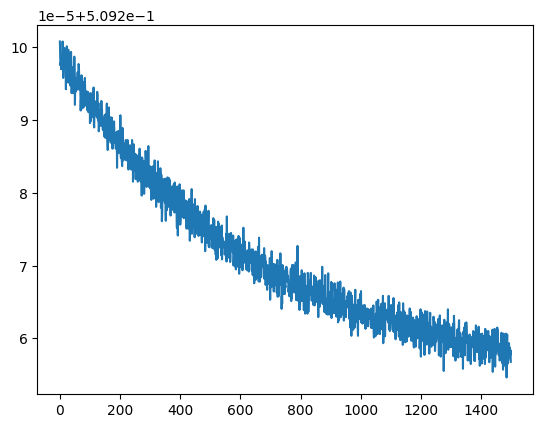

In [123]:
import matplotlib.pyplot as plt
plt.plot(normal_loss)


In [3]:
import torch 
import torch.nn as nn 
import numpy as np  

In [4]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70], 
                   [74, 66, 43], 
                   [91, 87, 65], 
                   [88, 134, 59], 
                   [101, 44, 37], 
                   [68, 96, 71], 
                   [73, 66, 44], 
                   [92, 87, 64], 
                   [87, 135, 57], 
                   [103, 43, 36], 
                   [68, 97, 70]], 
                  dtype='float32')


In [5]:
# Targets (apples, oranges)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119],
                    [57, 69], 
                    [80, 102], 
                    [118, 132], 
                    [21, 38], 
                    [104, 118], 
                    [57, 69], 
                    [82, 100], 
                    [118, 134], 
                    [20, 38], 
                    [102, 120]], 
                   dtype='float32')

In [6]:
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [9]:
from torch.utils.data import TensorDataset

In [10]:
train_ds = TensorDataset(inputs, targets)

In [11]:
type(train_ds)

torch.utils.data.dataset.TensorDataset